In [1]:
import pandas as pd
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
df= pd.read_csv('Bus_Stops.csv')

In [4]:
df.head()

,OBJECTID,Stop_Number,Stop_Name,Sub_Region,Municipality,Avg_Daily_Boardings__Monday_Friday,Avg_Daily_Boardings__Saturday,Avg_Daily_Boardings__Sunday_Holiday,Avg_Daily_Alightings__Monday_Friday,Avg_Daily_Alightings__Saturday,Avg_Daily_Alightings__Sunday_Holiday,Stop_Longitude,Stop_Latitude,Route_Connections,Data_Time_Period,Data_Suppression_Note,Line_Number2,x,y
0,1,50030,NB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,100,35,91,885,781,520,-123.122140,49.283593,002; 005; 032; 044; N22,Fall 2018,NaN,002,-1.370590e+07,6.323120e+06
1,2,50031,NB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,147,33,125,2406,1332,844,-123.120503,49.284688,002; 005; 032; 044,Fall 2018,NaN,002,-1.370571e+07,6.323307e+06
2,3,50043,BURRARD STN BAY 1,Vancouver/UBC,Vancouver,2966,1760,1137,200,34,168,-123.119982,49.285306,002; 005; 032; N22,Fall 2018,NaN,002,-1.370566e+07,6.323412e+06
3,4,50044,SB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,724,461,312,73,19,55,-123.121683,49.284166,002; 005; 032; 044; N22,Fall 2018,NaN,002,-1.370584e+07,6.323218e+06
4,5,50045,SB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,405,531,283,101,47,81,-123.123336,49.283087,002; 032; N22,Fall 2018,NaN,002,-1.370603e+07,6.323034e+06


In [5]:
df=df.rename(columns={'Stop_Number':'StopNo','Stop_Name':'SName','Sub_Region':'Region','Avg_Daily_Boardings__Monday_Friday':'AvgM2F','Avg_Daily_Boardings__Saturday':'AvgSat',
                  'Avg_Daily_Boardings__Sunday_Holiday':'AvgSun','Avg_Daily_Alightings__Monday_Friday':'DAvgM2F',
                  'Avg_Daily_Alightings__Saturday':'DAvgSat','Avg_Daily_Alightings__Sunday_Holiday':'DAvgSun',
                  'Stop_Longitude':'Longitude','Stop_Latitude':'Latitude'})

In [6]:
df.head(5)

,OBJECTID,StopNo,SName,Region,Municipality,AvgM2F,AvgSat,AvgSun,DAvgM2F,DAvgSat,DAvgSun,Longitude,Latitude,Route_Connections,Data_Time_Period,Data_Suppression_Note,Line_Number2,x,y
0,1,50030,NB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,100,35,91,885,781,520,-123.122140,49.283593,002; 005; 032; 044; N22,Fall 2018,NaN,002,-1.370590e+07,6.323120e+06
1,2,50031,NB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,147,33,125,2406,1332,844,-123.120503,49.284688,002; 005; 032; 044,Fall 2018,NaN,002,-1.370571e+07,6.323307e+06
2,3,50043,BURRARD STN BAY 1,Vancouver/UBC,Vancouver,2966,1760,1137,200,34,168,-123.119982,49.285306,002; 005; 032; N22,Fall 2018,NaN,002,-1.370566e+07,6.323412e+06
3,4,50044,SB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,724,461,312,73,19,55,-123.121683,49.284166,002; 005; 032; 044; N22,Fall 2018,NaN,002,-1.370584e+07,6.323218e+06
4,5,50045,SB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,405,531,283,101,47,81,-123.123336,49.283087,002; 032; N22,Fall 2018,NaN,002,-1.370603e+07,6.323034e+06


In [7]:
df=df[['StopNo','SName','Region', 'Municipality','AvgM2F','AvgSat','AvgSun','DAvgM2F','DAvgSat','DAvgSun','Longitude','Latitude']]

In [8]:
df.describe()

,StopNo,AvgM2F,AvgSat,AvgSun,DAvgM2F,DAvgSat,DAvgSun,Longitude,Latitude
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000
mean,52893.317750,151.484750,103.631500,79.71975,151.150500,103.79000,79.89275,-123.067233,49.248839
std,3387.979577,381.805934,258.262558,197.17777,346.724427,237.76932,180.02033,0.086472,0.027231
min,50002.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,-123.258526,49.133297
25%,50698.750000,15.000000,7.000000,5.00000,17.000000,8.00000,6.00000,-123.127096,49.227407
50%,51595.000000,56.000000,34.000000,25.00000,60.000000,36.00000,28.00000,-123.076475,49.251094
75%,52735.250000,144.250000,103.000000,79.00000,153.000000,109.00000,85.25000,-123.004928,49.269846
max,61990.000000,10767.000000,6643.000000,4433.00000,9066.000000,5360.00000,3855.00000,-122.801592,49.319397


In [9]:
df

,StopNo,SName,Region,Municipality,AvgM2F,AvgSat,AvgSun,DAvgM2F,DAvgSat,DAvgSun,Longitude,Latitude
0,50030,NB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,100,35,91,885,781,520,-123.122140,49.283593
1,50031,NB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,147,33,125,2406,1332,844,-123.120503,49.284688
2,50043,BURRARD STN BAY 1,Vancouver/UBC,Vancouver,2966,1760,1137,200,34,168,-123.119982,49.285306
3,50044,SB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,724,461,312,73,19,55,-123.121683,49.284166
4,50045,SB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,405,531,283,101,47,81,-123.123336,49.283087
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,53082,SB SPERLING AVE AT KITCHENER ST,Burnaby/New Westminster,Burnaby,57,41,31,36,22,28,-122.964689,49.271235
3996,53083,SB SPERLING AVE AT WINCH ST,Burnaby/New Westminster,Burnaby,25,17,14,27,14,14,-122.964679,49.269472
3997,53084,SB SPERLING AVE AT HALIFAX ST,Burnaby/New Westminster,Burnaby,13,9,8,21,9,12,-122.964676,49.267520
3998,53085,SB SPERLING AVE AT JORDAN DR,Burnaby/New Westminster,Burnaby,0,0,0,12,0,0,-122.964685,49.265137


In [10]:
df.nlargest(10,'AvgM2F')

,StopNo,SName,Region,Municipality,AvgM2F,AvgSat,AvgSun,DAvgM2F,DAvgSat,DAvgSun,Longitude,Latitude
2776,50913,COMMERCIAL-BROADWAY STN BAY 2,Vancouver/UBC,Vancouver,10767,6643,4433,352,160,103,-123.068750,49.262416
2800,61935,UBC EXCHANGE BAY 4,Vancouver/UBC,Vancouver,6248,2819,1954,0,0,0,-123.246831,49.267419
2768,50875,BROADWAY-CITY HALL STN BAY 1,Vancouver/UBC,Vancouver,6013,3809,2863,3880,2951,1981,-123.114283,49.263107
2635,60211,METROTOWN STN BAY 11,Burnaby/New Westminster,Burnaby,4619,3282,2600,0,0,0,-123.004152,49.226034
2790,58501,BROADWAY-CITY HALL STN BAY 4,Vancouver/UBC,Vancouver,4420,3211,2421,5594,3487,2417,-123.115714,49.263338
2760,56406,SURREY CENTRAL STN BAY 11,South of Fraser,Surrey,3958,2871,2262,2150,2088,1620,-122.847763,49.189406
2751,55411,NEWTON EXCHANGE BAY 3,South of Fraser,Surrey,3785,2836,2193,149,200,179,-122.842298,49.133297
3845,52736,METROTOWN STN BAY 4,Burnaby/New Westminster,Burnaby,3514,1924,1630,0,0,0,-123.002518,49.225794
2901,61337,MARINE DRIVE STN BAY 1,Vancouver/UBC,Vancouver,3292,2391,2129,3572,2550,2155,-123.116823,49.209087
2468,51787,JOYCE STN BAY 3,Vancouver/UBC,Vancouver,3192,0,0,0,0,0,-123.031047,49.237907


In [11]:
df.dtypes

StopNo            int64
SName            object
Region           object
Municipality     object
AvgM2F            int64
AvgSat            int64
AvgSun            int64
DAvgM2F           int64
DAvgSat           int64
DAvgSun           int64
Longitude       float64
Latitude        float64
dtype: object

In [12]:
df['TotalCongM2F']=df['AvgM2F'] + df['DAvgM2F'] 
df['TotalCongSat']=df['AvgSat'] + df['DAvgSat'] 
df['TotalCongSun']=df['AvgM2F'] + df['DAvgM2F'] 

In [13]:
df.head()

,StopNo,SName,Region,Municipality,AvgM2F,AvgSat,AvgSun,DAvgM2F,DAvgSat,DAvgSun,Longitude,Latitude,TotalCongM2F,TotalCongSat,TotalCongSun
0,50030,NB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,100,35,91,885,781,520,-123.122140,49.283593,985,816,985
1,50031,NB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,147,33,125,2406,1332,844,-123.120503,49.284688,2553,1365,2553
2,50043,BURRARD STN BAY 1,Vancouver/UBC,Vancouver,2966,1760,1137,200,34,168,-123.119982,49.285306,3166,1794,3166
3,50044,SB BURRARD ST AT W GEORGIA ST,Vancouver/UBC,Vancouver,724,461,312,73,19,55,-123.121683,49.284166,797,480,797
4,50045,SB BURRARD ST AT ROBSON ST,Vancouver/UBC,Vancouver,405,531,283,101,47,81,-123.123336,49.283087,506,578,506


In [14]:
df=df.drop(['AvgM2F','AvgSat','AvgSun','DAvgM2F','DAvgSat','DAvgSun'],axis=1)

In [15]:
df['TCon']=df['TotalCongM2F']+ df['TotalCongSat'] + df['TotalCongSun']


In [16]:
df['number']=1

In [17]:
df_region=df.groupby('Region').sum().reset_index()


In [18]:
df_van= df[df.Region=='Vancouver/UBC']
df_van_sname= df_van.groupby('SName').sum().reset_index()
df_van_sname['ConDensity']=df_van_sname['TCon']/df_van_sname['number']

In [19]:
df_van_sname.nlargest(100, 'ConDensity')

,SName,StopNo,Longitude,Latitude,TotalCongM2F,TotalCongSat,TotalCongSun,TCon,number,ConDensity
24,COMMERCIAL-BROADWAY STN BAY 2,50913,-123.068750,49.262416,11119,6803,11119,29041,1,29041.00
14,BROADWAY-CITY HALL STN BAY 4,58501,-123.115714,49.263338,10014,6698,10014,26726,1,26726.00
10,BROADWAY-CITY HALL STN BAY 1,50875,-123.114283,49.263107,9893,6760,9893,26546,1,26546.00
1390,UBC EXCHANGE BAY 4,61935,-123.246831,49.267419,6248,2819,6248,15315,1,15315.00
579,NB COMMERCIAL DR AT E 10 AVE,51221,-123.069654,49.261744,5374,3657,5374,14405,1,14405.00
...,...,...,...,...,...,...,...,...,...,...
537,NB BURRARD ST AT W GEORGIA ST,200124,-492.482012,197.138752,4943,2521,4943,12407,4,3101.75
846,NB RENFREW ST AT HEBB AVE,51082,-123.044100,49.259529,1093,864,1093,3050,1,3050.00
1421,WB DAVIE ST AT GRANVILLE ST,50025,-123.126514,49.277437,1115,815,1115,3045,1,3045.00
423,EB W BROADWAY AT GRANVILLE ST-,50326,-123.137941,49.263504,1081,880,1081,3042,1,3042.00


In [20]:
global n

n= folium.Map(location=[49.24966, -123.11934],zoom_start=10)
def mark_all_station(index,lat,long,name,congestion_count):
    tooltip=name
    if index<250:
        folium.Marker([lat,long],popup='<strong>'+str(congestion_count)+'</strong>',tooltip=tooltip,icon=folium.Icon(color='darkred')).add_to(n)

    elif index>250 and index<=500:
        folium.Marker([lat,long],popup='<strong>'+str(congestion_count)+'</strong>',tooltip=tooltip,icon=folium.Icon(color='red')).add_to(n)
   
    elif index>500 and index<=750:
        folium.Marker([lat,long],popup='<strong>'+str(congestion_count)+'</strong>',tooltip=tooltip,icon=folium.Icon(color='orange')).add_to(n)
  
    else:
        folium.Marker([lat,long],popup='<strong>'+str(congestion_count)+'</strong>',tooltip=tooltip,icon=folium.Icon(color='green')).add_to(n)
  
    n.save('van.html')
    
count=1    
for index, row in df_van_sname.iterrows():
    mark_all_station(count,row['Latitude'], row['Longitude'],row['SName'],row['TCon'])
    count=count+1

KeyboardInterrupt: 

In [21]:
df_region['ConDensity']= df_region['TCon']/df_region['number']
df_region

,Region,StopNo,Longitude,Latitude,TotalCongM2F,TotalCongSat,TotalCongSun,TCon,number,ConDensity
0,Burnaby/New Westminster,63282293,-144979.268614,58049.196895,207388,120801,207388,535577,1179,454.263783
1,North Shore,1781997,-4059.912658,1627.287388,4273,1305,4273,9851,33,298.515152
2,Northeast Sector,281640,-614.462821,246.227146,110,56,110,276,5,55.200000
3,Richmond,1180399,-2705.482140,1082.202646,2436,1036,2436,5908,22,268.545455
4,South of Fraser,2839414,-6390.460016,2556.965518,38308,29672,38308,106288,52,2044.000000
5,Vancouver/UBC,142207528,-333519.345502,133433.475395,958026,676816,958026,2592868,2709,957.131045


Text(0.5,1,'Congestion Density')

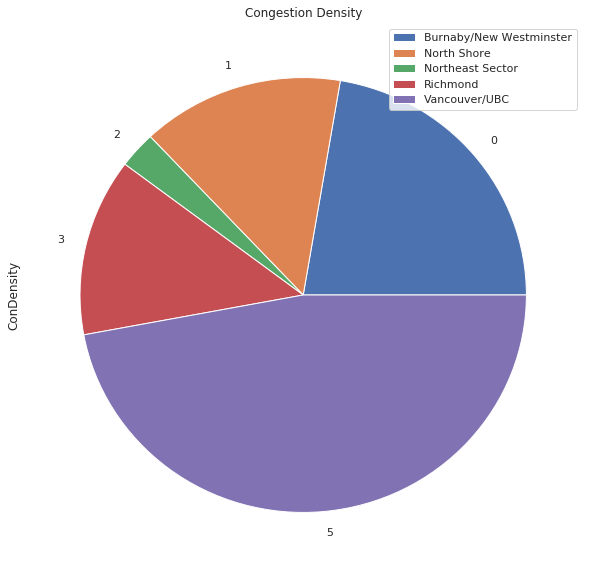

In [22]:
df_region=df_region.drop(df_region.index[4])
df_region.plot.pie(y='ConDensity',figsize=(10, 10))
plt.legend(df_region['Region'])
plt.title('Congestion Density')


In [23]:
df_station= df.groupby('SName').sum().reset_index()
df_station=df_station.sort_values('TCon', ascending=False)

In [24]:
df_station=df_station.nlargest(1000, 'TCon')

In [25]:
df_station.head(10)

,SName,StopNo,Longitude,Latitude,TotalCongM2F,TotalCongSat,TotalCongSun,TCon,number
42,COMMERCIAL-BROADWAY STN BAY 2,50913,-123.068750,49.262416,11119,6803,11119,29041,1
778,MARINE DRIVE STN BAY 1,306685,-615.584115,246.045435,10518,7868,10518,28904,5
25,BROADWAY-CITY HALL STN BAY 4,58501,-123.115714,49.263338,10014,6698,10014,26726,1
956,NB COMMERCIAL DR AT N GRANDVIEW HWY,116982,-246.139164,98.526840,10104,6397,10104,26605,2
21,BROADWAY-CITY HALL STN BAY 1,50875,-123.114283,49.263107,9893,6760,9893,26546,1
2166,UBC EXCHANGE UNLOADING ONLY,360936,-739.483764,295.605858,10378,4143,10378,24899,6
785,METROTOWN STN BAY 10,240780,-492.019712,196.905560,7758,5039,7758,20555,4
1084,NB GRANVILLE ST AT W GEORGIA ST,490344,-984.946328,394.258536,7197,5142,7197,19536,8
2410,WB E HASTINGS ST AT MAIN ST,313934,-738.598052,295.688584,6651,5686,6651,18988,6
1203,NB MAIN ST AT TERMINAL AVE,200724,-492.399324,197.093580,6195,5637,6195,18027,4
